## Set up environment

In [1]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import permutation_test as p

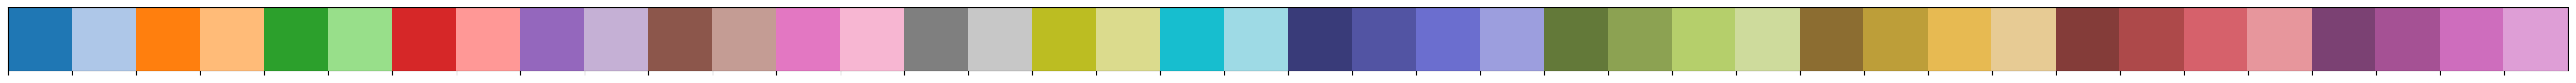

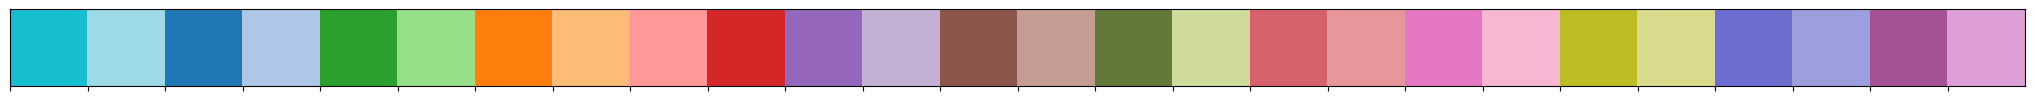

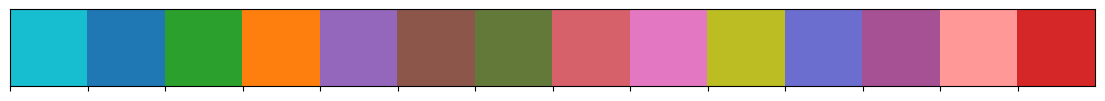

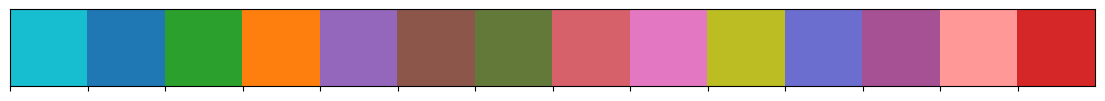

In [2]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR',
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3),
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

In [3]:
# Get data
figshare_url = "https://figshare.com/ndownloader/files/"
file_dict = {"DemographicAnalyses.csv": "59732276",
             "CleanedMotorScores.csv": "59732273",
             "CleanedLanguageScores.csv": "59732270",
             "CleanedCognitionScores.csv": "59732267"}


import urllib.request
for kk, vv in file_dict.items():
    urllib.request.urlretrieve(figshare_url + vv, "inputData/" + kk)

('inputData/DemographicAnalyses.csv', <http.client.HTTPMessage at 0x13b1cd850>)

('inputData/CleanedMotorScores.csv', <http.client.HTTPMessage at 0x13b1d6f50>)

('inputData/CleanedLanguageScores.csv',
 <http.client.HTTPMessage at 0x13b226b50>)

('inputData/CleanedCognitionScores.csv',
 <http.client.HTTPMessage at 0x13b220090>)

In [4]:
FactorAnalyses=pd.read_csv('./inputData/DemographicAnalyses.csv', index_col=None)
CleanedMotorScores=pd.read_csv('./inputData/CleanedMotorScores.csv', index_col=None)
CleanedLanguageScores=pd.read_csv('./inputData/CleanedLanguageScores.csv', index_col=None)
CleanedCognitionScores=pd.read_csv('./inputData/CleanedCognitionScores.csv', index_col=None)

## Demographic analyses

PearsonRResult(statistic=np.float64(0.42464666311156296), pvalue=np.float64(2.2311907515655787e-13))

Text(0.5, 28.999999999999986, 'Gestational Age (weeks)')

Text(29.0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

(array([28., 30., 32., 34., 36., 38., 40., 42., 44., 46.]),
 [Text(28.0, 0, '28'),
  Text(30.0, 0, '30'),
  Text(32.0, 0, '32'),
  Text(34.0, 0, '34'),
  Text(36.0, 0, '36'),
  Text(38.0, 0, '38'),
  Text(40.0, 0, '40'),
  Text(42.0, 0, '42'),
  Text(44.0, 0, '44'),
  Text(46.0, 0, '46')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Scan Age')

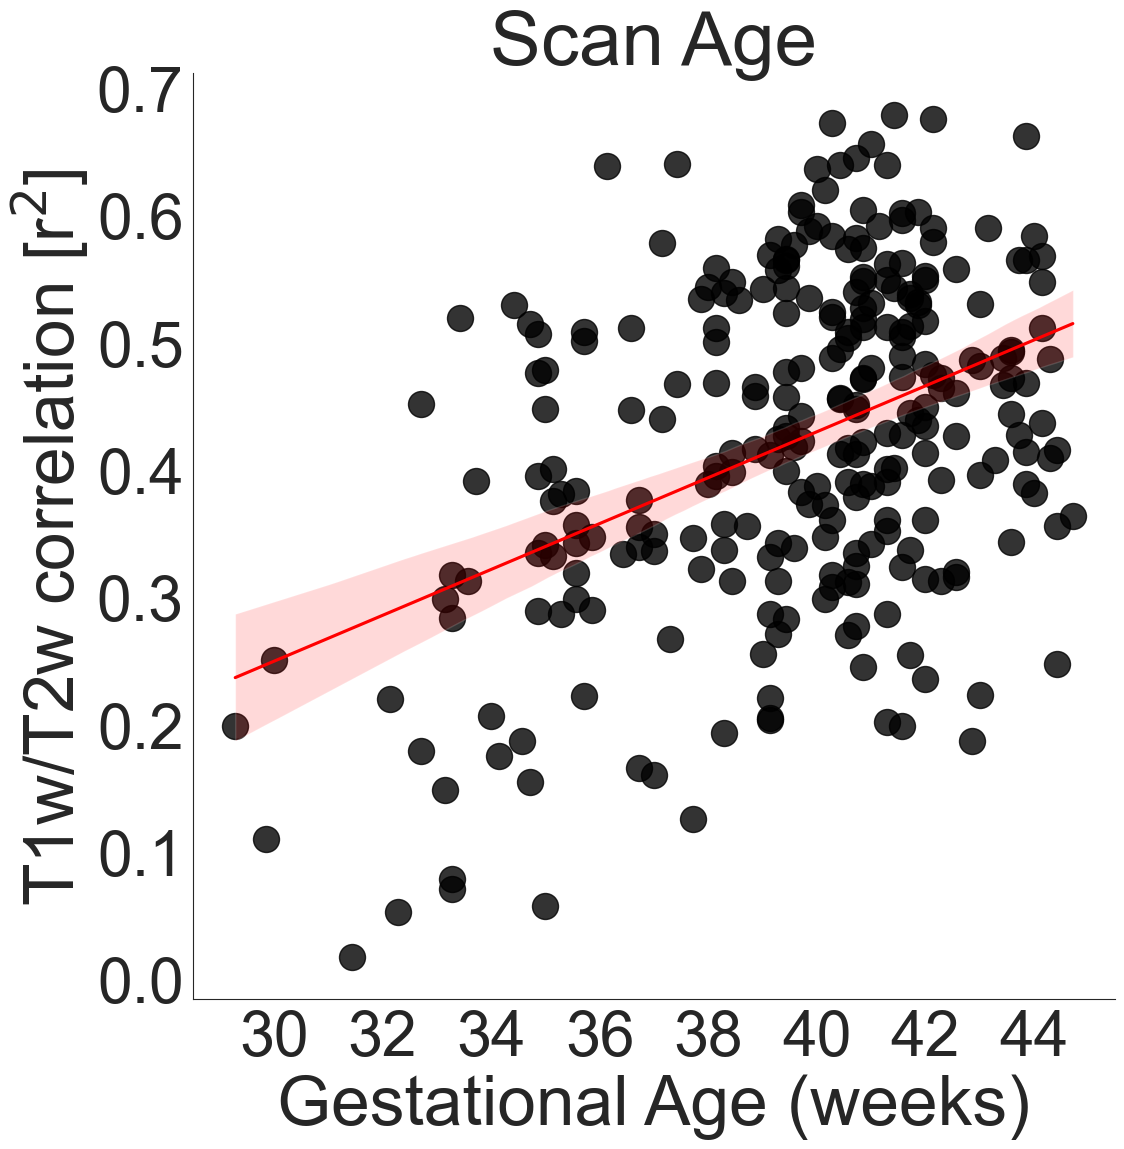

In [5]:
sns.set_style('white');
fig1=sns.lmplot(
    data=FactorAnalyses, x='scan_age', y="r2", scatter_kws={"s": 350, 'color':'black'}, height=10, fit_reg=False, legend=False,
)
fig1=sns.regplot(data=FactorAnalyses, x='scan_age', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(FactorAnalyses['scan_age'], FactorAnalyses['r2'])
plt.xlabel("Gestational Age (weeks)", fontsize=50)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Scan Age', fontsize=55)

#os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/R2AndScanAge.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=np.float64(0.41872988884899726), pvalue=np.float64(5.147115019718864e-13))

Text(0.5, 29.140624999999986, 'Gestational Age (weeks)')

Text(29.0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

([<matplotlib.axis.XTick at 0x14a01d3d0>,
 [Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Birth Age')

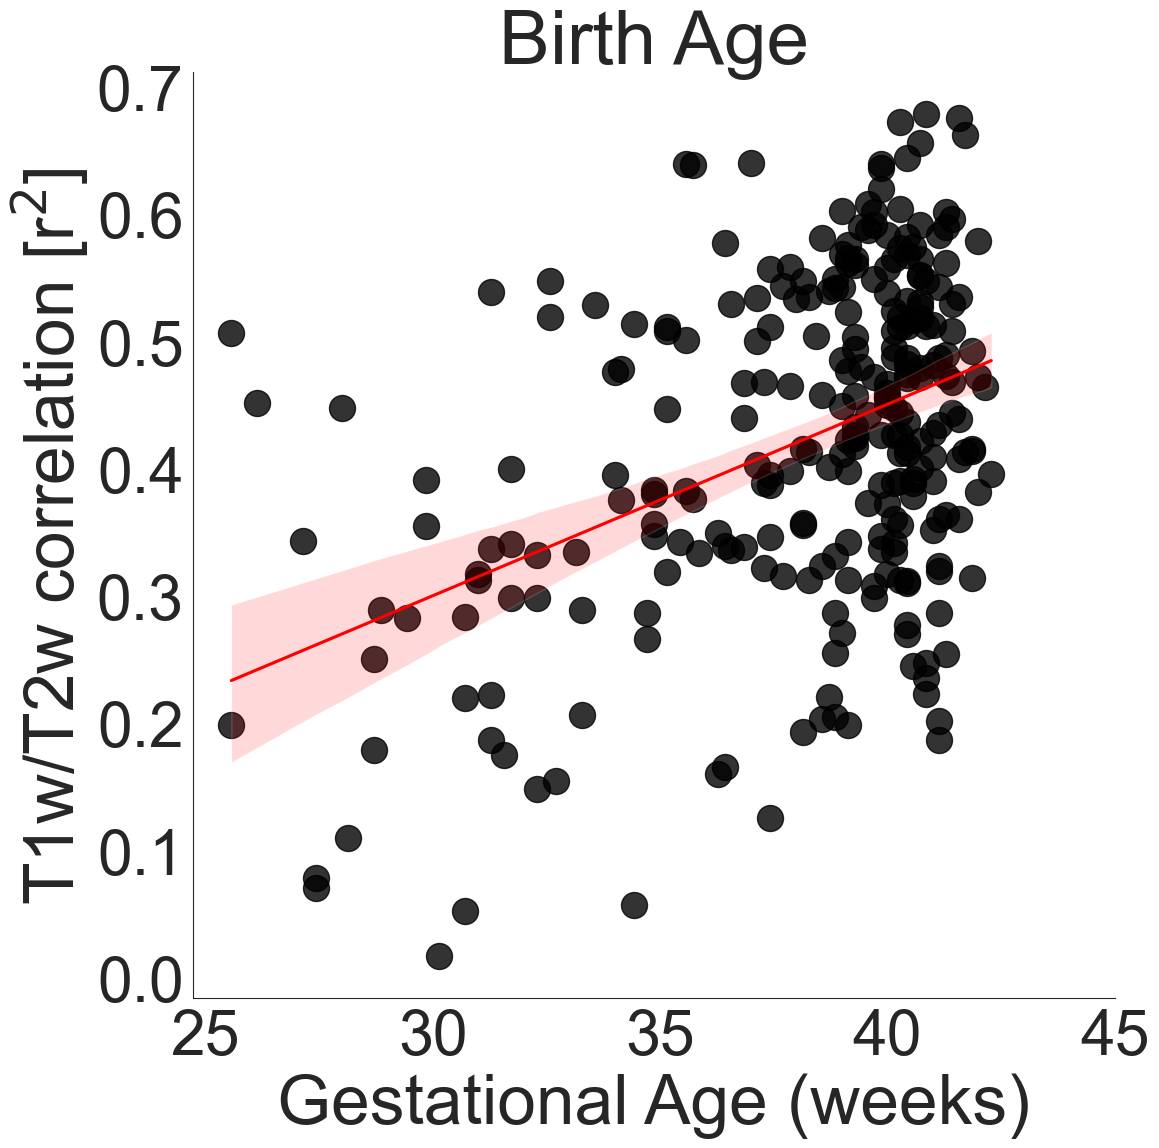

In [6]:
sns.set_style('white');
fig1=sns.lmplot(
    data=FactorAnalyses, x='birth_age', y="r2", scatter_kws={"s": 350, 'color':'black'}, height=10, fit_reg=False, legend=False,
)
fig1=sns.regplot(data=FactorAnalyses, x='birth_age', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(FactorAnalyses['birth_age'], FactorAnalyses['r2'])
plt.xlabel("Gestational Age (weeks)", fontsize=50)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=50)
plt.xticks([25, 30, 35, 40, 45], fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Birth Age', fontsize=55)

#os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/R2AndBirthAge.png', dpi=600, bbox_inches = "tight")

<Figure size 800x1000 with 0 Axes>

<Axes: xlabel='gender', ylabel='r2'>

Text(0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Sex')

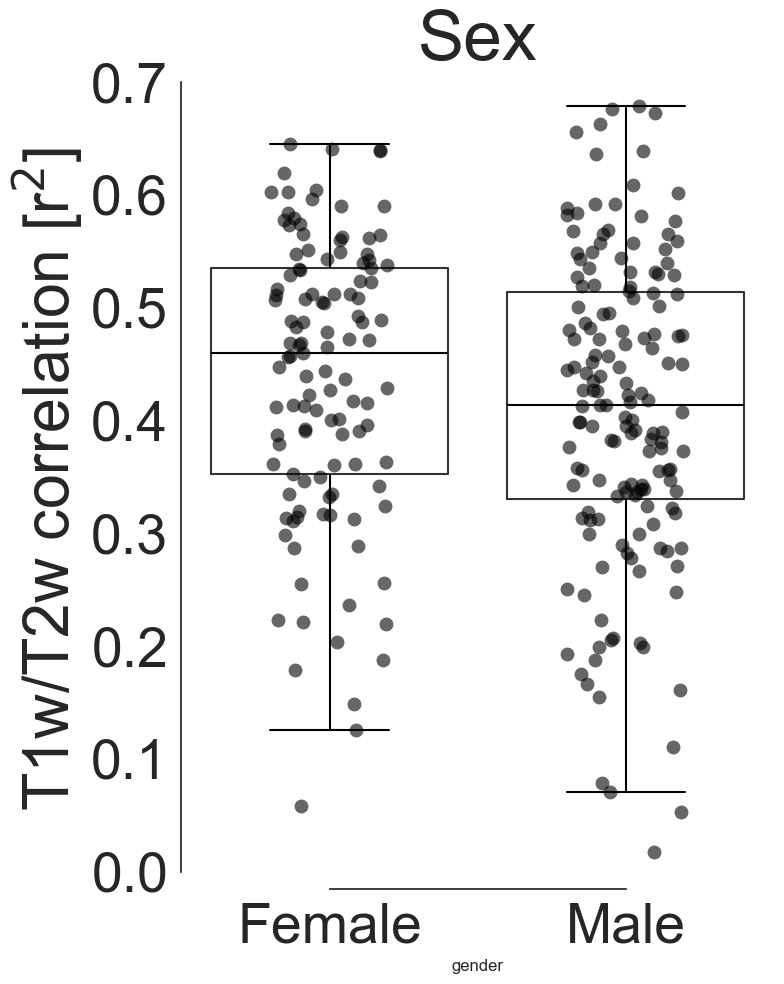

In [7]:
sns.set_theme(style="white")

plt.figure(figsize=(8, 10))
ax = sns.boxplot(
    data=FactorAnalyses,
    x="gender", y="r2",
    fill=False,
    color='black',
    #palette=["#9ecae1", "#fc9272"],
    width=0.8, showfliers=False, boxprops={"alpha": 0.8}
)
sns.stripplot(
    data=FactorAnalyses,
    x="gender", y="r2",
    color="black", size=10, jitter=0.2, alpha=0.6
)

#plt.xlabel("Sex", fontsize=45)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Sex', fontsize=50)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('./figures/R2AndGender.png', dpi=600, bbox_inches = "tight")
plt.show()

In [8]:
from scipy.stats import ttest_ind

male = FactorAnalyses.loc[FactorAnalyses['gender']=='Male', 'r2']
female = FactorAnalyses.loc[FactorAnalyses['gender']=='Female', 'r2']


t_stat, p_val = ttest_ind(male, female, equal_var=False)  # Welch’s t-test
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")

t = -1.876, p = 0.0617


## Behavioral Analyses

PearsonRResult(statistic=np.float64(0.16963810991856873), pvalue=np.float64(0.015030363557382048))

Text(0.5, 33.281249999999986, 'Motor Scores')

Text(33.0, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20'),
  Text(22.0, 0, '22'),
  Text(24.0, 0, '24'),
  Text(26.0, 0, '26'),
  Text(28.0, 0, '28'),
  Text(30.0, 0, '30')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Motor Subscale')

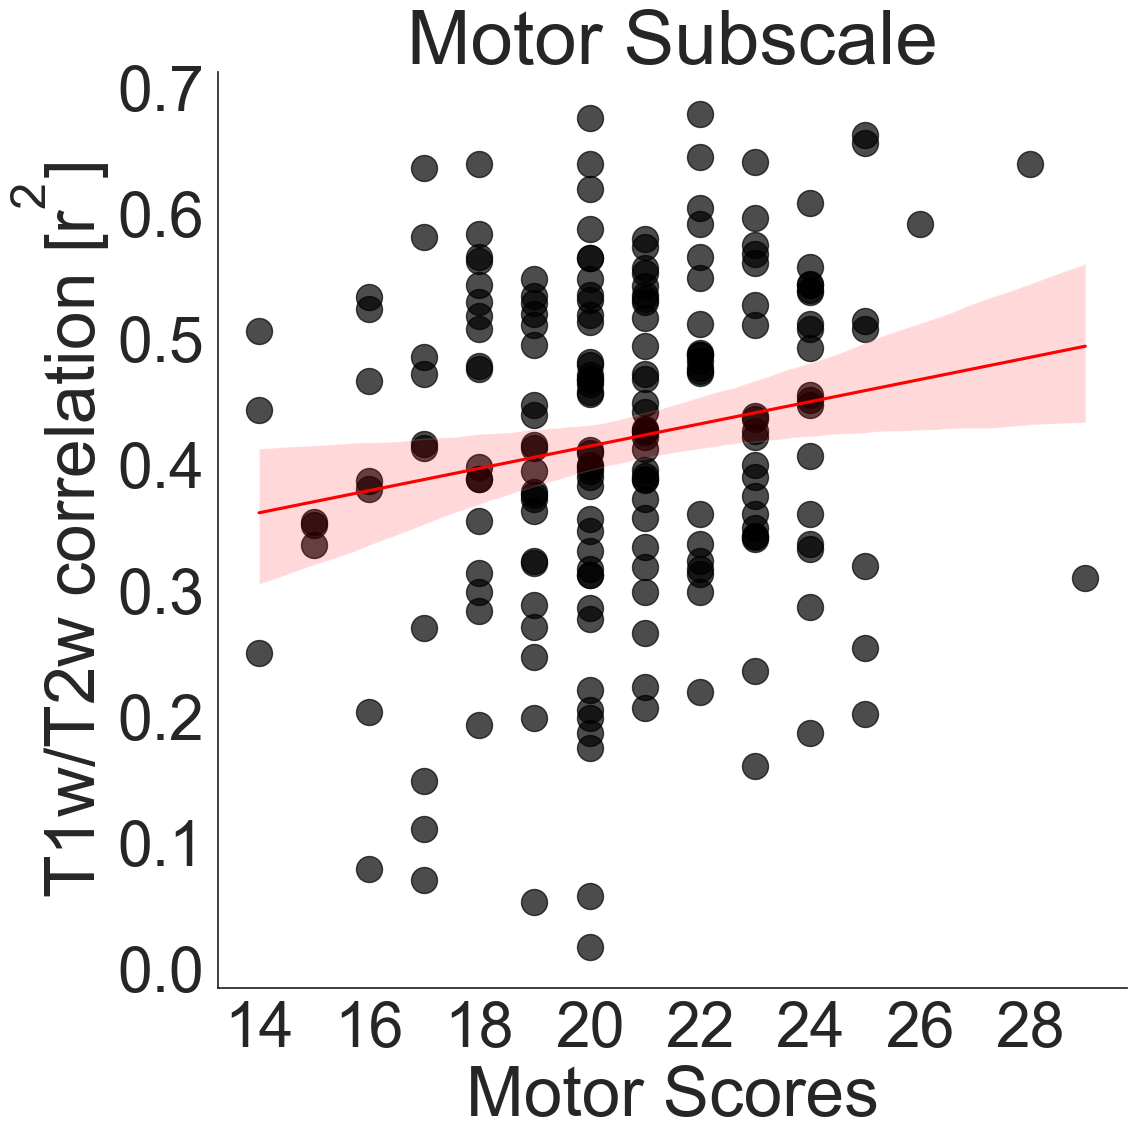

In [9]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedMotorScores, x='bsid_mot_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedMotorScores, x='bsid_mot_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedMotorScores['bsid_mot_sumscaled'], CleanedMotorScores['r2'])
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/r2_motor_cleaned.png', dpi=600, bbox_inches = "tight")

In [10]:
import statsmodels.api as sm
import pandas as pd

df=CleanedMotorScores

# Base model
model_base = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2', data=df).fit()

# Alternative models
model_scanAge = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + scan_age', data=df).fit()
model_birthAge = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + birth_age', data=df).fit()
model_sex = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + sex', data=df).fit()

# Compare models using ANOVA (likelihood ratio test)
from statsmodels.stats.anova import anova_lm

anova_scanAge = anova_lm(model_base, model_scanAge)
anova_birthAge = anova_lm(model_base, model_birthAge)
anova_sex = anova_lm(model_base, model_sex)

print("Compare base vs +scanAge:\n", anova_scanAge)
print("Compare base vs +birthAge:\n", anova_birthAge)
print("Compare base vs +sex:\n", anova_sex)


PatsyError: Error evaluating factor: NameError: name 'scan_age' is not defined
    bsid_mot_sumscaled ~ r2 + scan_age
                              ^^^^^^^^

In [11]:
df

,bsid_mot_sumscaled,bsid_lang_sumscaled,bsid_cog_sumscaled,interview_age,WeAvGMT1wT2w,t1wt2w,r2,p
0,16,11,8,19.0,1.253620,0.849098,0.523879,0.000029
1,25,22,11,19.0,1.114477,0.611412,0.508191,0.000044
2,20,19,12,18.0,1.284727,0.832711,0.277790,0.005665
3,22,22,9,18.0,1.307459,0.847321,0.313218,0.002951
4,19,13,8,18.0,1.155027,0.725021,0.372938,0.000921
...,...,...,...,...,...,...,...,...
200,20,19,13,20.0,1.082344,0.683652,0.383540,0.000742
201,20,20,14,20.0,1.117321,0.715423,0.356974,0.001269
202,16,20,8,20.0,1.342871,0.978292,0.466654,0.000120
203,20,26,10,18.0,1.248763,0.834134,0.565069,0.000010


In [ ]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedCognitionScores['bsid_cog_sumscaled'], CleanedCognitionScores['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/r2_cognition_cleaned.png', dpi=600, bbox_inches = "tight")

In [ ]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedLanguageScores['bsid_lang_sumscaled'], CleanedLanguageScores['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/r2_language_cleaned.png', dpi=600, bbox_inches = "tight")